In [2]:
import pandas as pd

data = pd.read_csv("datasets/amazon_reviews.csv")

In [3]:
data.head()

,class_index,review_title,review_text
0,2,Great CD,My lovely Pat has one of the GREAT voices of h...
1,2,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...
2,1,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...
3,2,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...
4,2,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...


In [4]:
data['class_index'].value_counts()

class_index
2    200000
1    200000
Name: count, dtype: int64

In [5]:
data.isnull().sum()

class_index      0
review_title    24
review_text      0
dtype: int64

In [6]:
data.fillna('', inplace=True)
data.isnull().sum()

class_index     0
review_title    0
review_text     0
dtype: int64

In [7]:
data['class_index'] = data['class_index'] - 1
data.head()


,class_index,review_title,review_text
0,1,Great CD,My lovely Pat has one of the GREAT voices of h...
1,1,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...
2,0,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...
3,1,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...
4,1,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...


In [8]:
data['review'] = data['review_title'] + ' ' + data['review_text']
data.head()

,class_index,review_title,review_text,review
0,1,Great CD,My lovely Pat has one of the GREAT voices of h...,Great CD My lovely Pat has one of the GREAT vo...
1,1,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...,One of the best game music soundtracks - for a...
2,0,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...,Batteries died within a year ... I bought this...
3,1,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...,"works fine, but Maha Energy is better Check ou..."
4,1,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...,Great for the non-audiophile Reviewed quite a ...


In [9]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove punctuation
    text = " ".join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    text = " ".join([lemmatizer.lemmatize(word) for word in text.split()])  # Lemmatization
    return text

data['review'] = data['review'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/seanlai/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /Users/seanlai/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
from langdetect import detect

# Function to detect and remove non-English text
def is_english(text):
    try:
        return detect(text) == "en"
    except:
        return False
    
data = data[data['review'].apply(is_english)]

In [11]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [12]:
# Tokenization
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(data['review'])
sequences = tokenizer.texts_to_sequences(data['review'])

# Padding sequences
max_length = 100  # Define a max sequence length
X = pad_sequences(sequences, maxlen=max_length, padding='post')
y = np.array(data['class_index'])

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Define the LSTM model
model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=max_length),  # Word embeddings
    LSTM(64),  # LSTM with 64 units
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Summary
model.summary()

/Users/seanlai/Projects/sentiment-analysis/.venv/lib/python3.9/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), verbose=1)

Epoch 1/5
9911/9911 ━━━━━━━━━━━━━━━━━━━━ 300s 30ms/step - accuracy: 0.5296 - loss: 0.6749 - val_accuracy: 0.8821 - val_loss: 0.2819
Epoch 2/5
9911/9911 ━━━━━━━━━━━━━━━━━━━━ 297s 30ms/step - accuracy: 0.8917 - loss: 0.2620 - val_accuracy: 0.8980 - val_loss: 0.2448
Epoch 3/5
9911/9911 ━━━━━━━━━━━━━━━━━━━━ 304s 31ms/step - accuracy: 0.9123 - loss: 0.2159 - val_accuracy: 0.9037 - val_loss: 0.2351
Epoch 4/5
9911/9911 ━━━━━━━━━━━━━━━━━━━━ 308s 31ms/step - accuracy: 0.9235 - loss: 0.1903 - val_accuracy: 0.9030 - val_loss: 0.2396
Epoch 5/5
9911/9911 ━━━━━━━━━━━━━━━━━━━━ 298s 30ms/step - accuracy: 0.9344 - loss: 0.1673 - val_accuracy: 0.9014 - val_loss: 0.2525


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 128)       │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,068,421 (7.89 MB)

 Trainable params: 689,473 (2.63 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,378,948 (5.26 MB)

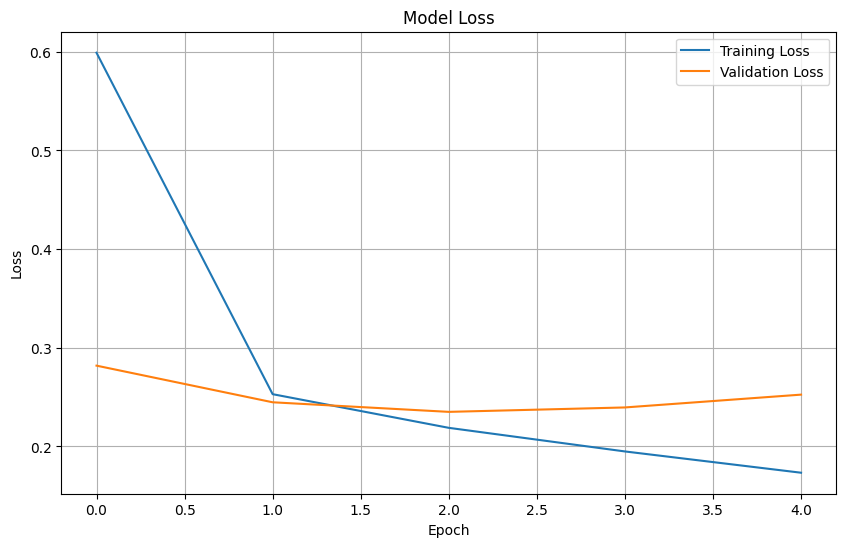

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

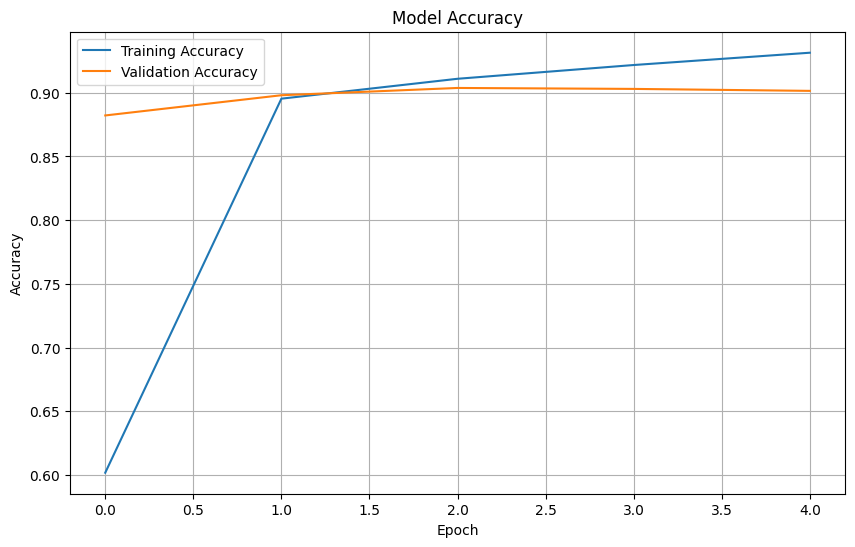

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
from sklearn.metrics import classification_report
import numpy as np

y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

2478/2478 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step
              precision    recall  f1-score   support

    Negative       0.91      0.89      0.90     39718
    Positive       0.89      0.91      0.90     39563

    accuracy                           0.90     79281
   macro avg       0.90      0.90      0.90     79281
weighted avg       0.90      0.90      0.90     79281

